<a href="https://colab.research.google.com/github/DivyamPal/Fake-News-Detection/blob/main/DeceptiveContentAnalysisMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
db=pd.read_csv('/content/drive/MyDrive/data/WELFake_Dataset.csv')
db.head(4)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0


In [ ]:
fake = db[db['label']==0]
real = db[db['label']==1]
fake

,Unnamed: 0,title,text,label
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
11,11,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,0
12,12,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",0
14,14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,0
15,15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0
...,...,...,...,...
72124,72124,An Unlikely Contender Rises in France as the A...,"PARIS — In the age of Donald J. Trump, “Bre...",0
72126,72126,Determined to kill: Can tough gun laws end mas...,The flag at Desert Hot Springs' Condor Gun Sho...,0
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0


## Word Cloud


In [ ]:
text = ' '.join(fake['text'].tolist())

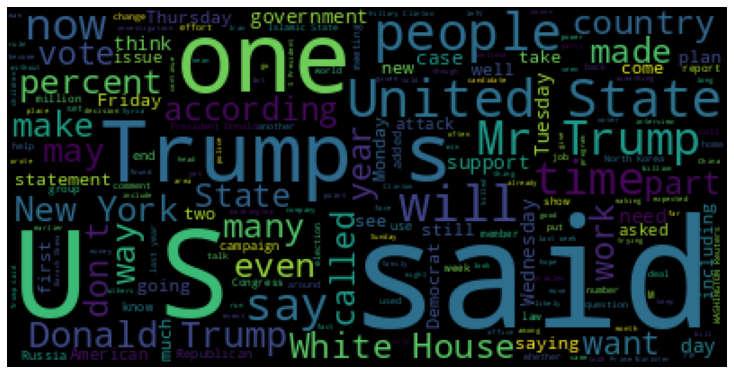

In [ ]:
wordcloud = WordCloud().generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
textreal = real['text'].tolist()
realtext=''
for i in textreal:
  if i:
    realtext+=str(i)

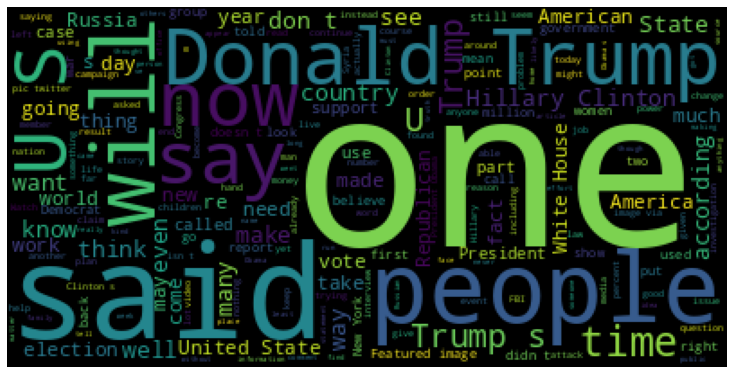

In [ ]:
wordcloudreal = WordCloud().generate(realtext)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloudreal)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
titlefake = ' '.join(fake['title'].tolist())


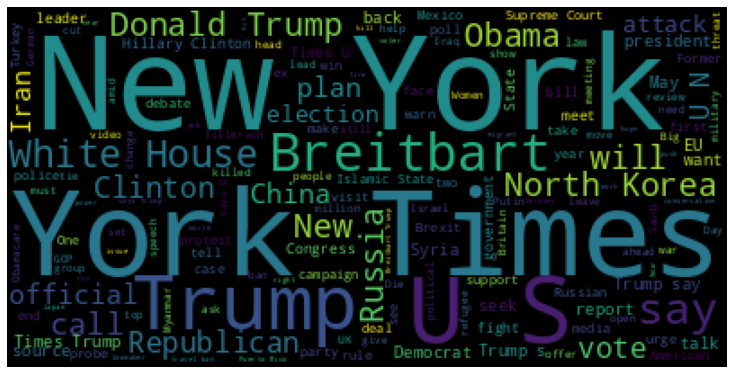

In [ ]:
wordcloud = WordCloud().generate(titlefake)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
realtitle = real['title'].tolist()
titlereal = ''
for i in realtitle:
  if i:
    titlereal+=str(i)

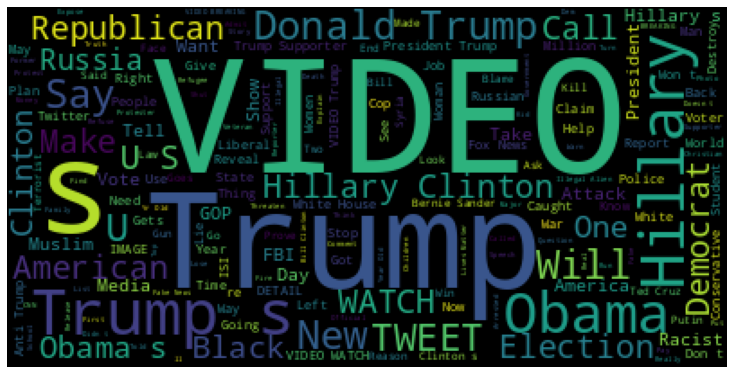

In [ ]:
wordcloud = WordCloud().generate(titlereal)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Difference in Text
### In Title of fake and real news
#### 1. Video word in Real title
#### 2. Hillary word in real
#### 3. New York in fake
### In Text of real and fake news
#### 1. United States in Fake text

In [ ]:
empty_real_index=[index for index,text in enumerate(real.text.tolist()) if str(text).strip()=='']

In [ ]:
real.iloc[empty_real_index]

,Unnamed: 0,title,text,label
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
106,106,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1
325,325,Ohio State University Student Says Terrorist A...,,1
364,364,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,1
512,512,OBAMA’S LIST OF 21 MEDAL OF FREEDOM Recipients...,,1
...,...,...,...,...
71771,71771,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,1
71914,71914,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,1
72026,72026,BOOM! Woman Tries To Steal TRUMP Signs BUT Thi...,,1
72119,72119,BILL O’REILLY Destroys Liberal Pundit On Trump...,,1


In [ ]:
real['text'] = real['title'] + ' ' + real['text']
fake['text'] = fake['title'] + ' ' + fake['text']

<ipython-input-18-d4abbd2bc4bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = real['title'] + ' ' + real['text']
<ipython-input-18-d4abbd2bc4bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['text'] = fake['title'] + ' ' + fake['text']


In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

<ipython-input-19-ea1fa14ea903>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real['text'] = real['text'].apply(lambda x: str(x).lower())
<ipython-input-19-ea1fa14ea903>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake['text'] = fake['text'].apply(lambda x: str(x).lower())


# Pre Processing

In [ ]:
real = real[['text','label']]
fake = fake[['text','label']]

In [ ]:
data = real.append(fake, ignore_index=True)

<ipython-input-21-45d5ced910ac>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = real.append(fake, ignore_index=True)


In [ ]:
data.head(5)

,text,label
0,law enforcement on high alert following threat...,1
1,nan,1
2,unbelievable! obama’s attorney general says mo...,1
3,satan 2: russia unvelis an image of its terrif...,1
4,about time! christian group sues amazon and sp...,1


In [ ]:
empty_data_index=[index for index,text in enumerate(data.text.tolist()) if str(text)=='nan']


In [ ]:
data = data.drop(empty_data_index, axis=0)

In [ ]:

!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-14 13:56:15.189406: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-14 13:56:15.189561: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-14 13:56:15.189590: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
!pip install spacy==3.0.0
import preprocess_kgptalkie as ps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python --version

Python 3.9.16


In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

# Vectorization - Word2Vec

In [ ]:
import gensim

In [ ]:
Y = data['label'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

439050

In [ ]:
w2v_model.wv['trump']

array([ 2.8525791e+00,  1.9992086e+00,  2.1158252e+00, -1.3146681e+00,
        9.0143794e-01, -5.8444376e+00,  1.7785048e+00,  2.7811482e+00,
        6.3389416e+00,  3.0807288e+00,  1.1651014e+00,  6.6904265e-01,
        1.7256340e+00, -2.7714412e+00,  2.8887062e+00, -3.9190297e+00,
        2.9276533e+00,  1.4307351e+00,  5.8812656e+00,  6.7815704e+00,
       -1.9464152e+00,  5.2539665e-01,  1.1101743e+00, -2.7009845e+00,
        2.0617018e+00, -4.7234635e+00, -4.1712722e-01,  1.4282528e+00,
        1.5450773e+00,  5.1016836e+00, -5.0162935e+00,  2.8174605e+00,
        7.6046509e-01, -3.5762630e+00,  6.8439162e-01, -5.8280540e-01,
        6.9107442e+00, -2.0748601e+00,  2.0838263e+00,  2.2866988e+00,
        4.6000481e+00, -1.0047634e+00,  4.2681160e+00,  3.9548594e-01,
        4.3945870e+00,  1.1729574e+00,  1.5434340e+00,  2.4181471e+00,
       -6.7780905e+00, -5.0056392e-01,  4.9592571e+00,  1.9426246e+00,
       -1.1510679e+00, -2.1540484e+00,  3.8405852e+00, -1.6710891e-01,
      

In [ ]:
w2v_model.wv.most_similar('india')

[('malaysia', 0.7543451189994812),
 ('indias', 0.7504203915596008),
 ('pakistan', 0.7344357967376709),
 ('thailand', 0.727362871170044),
 ('japan', 0.7072469592094421),
 ('china', 0.690098226070404),
 ('australia', 0.6767936944961548),
 ('indonesia', 0.6687873601913452),
 ('philippines', 0.6676372289657593),
 ('kashmir', 0.6640346050262451)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
# tokenizer.word_index

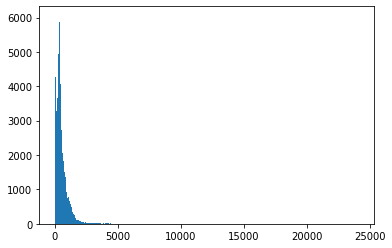

In [ ]:
plt.hist([len(x) for x in X], bins = 500)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
# len(X)
len(nos[nos>1500])

2989

In [ ]:
# Truncate news with size >1500
maxlen = 1500
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X)

71537

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] =  model.wv[word]

  return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(439051, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length = maxlen, trainable=False))
model.add(LSTM(units=256))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
model.fit(X_train, Y_train, validation_split=0.3, epochs=6)

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)


In [ ]:
accuracy_score(Y_test, y_pred)

In [ ]:
print(classification_report(Y_test, y_pred))

In [ ]:
#convert text to matrix to chech news
x = ['This is a news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >=0.5). astype(int)

In [ ]:
x = ['19-year-old woman receptionist Ankita Bhandari, who was allegedly killed in Uttarakhand by her employer, died due to drowning, news agency PTI reported on Sunday (September 25, 2022) citing the preliminary report. The draft report released by the All India Institute of Medical Sciences, Rishikesh, also said that antemortem injuries (injuries before death) have been found on Ankita Bhandari body, suggestive of a blunt force trauma.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5). astype(int)